In [6]:
import itertools
import random
import numpy as np
from collections import defaultdict, Counter

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline
import networkx as nx

In [7]:
# Run this only in Colab environment
# from google.colab import drive
# drive.mount('/content/gdrive')
# path = '/content/gdrive/My Drive/<your_gdrivefolder>/data/'
###############################################################
# for local storage
path = '../data/'

## Exercise 1 (6 pts)


Compare random networks with a regular lattice.

(i) 
Generate a two-dimensional lattice as a network (`nx.grid_2d_graph(n,m)`) and make a layout using `nx.spring_layout(G,iterations = 100)` (1pt)

(ii) 
Draw the network, try using more iteration steps to obtain a descent lattice (1pt)

(iii)
Compare the average shortest path lengths between the lattice network, ER random networks and BA random networks.
Try out different connection probabilities (for ER) or number of links $m$ to connect (for BA respectively). 
Plot your findings such that the differnt scaling over the number of nodes become obvious. (3pts)

(iV)
Interprete your results. Do they match your expectations? (1pt)

---

## Exercise 2 (7 pts)

Degree dynamics and degree distribution of BA networks.

(i)
Generate BA networks of increasing size and compare (fit) the degree dynamics to it. Identify the preferential attachment by its specific scaling over time. (3pts)

(ii)
Generate BA networks of reasonable large size and plot the degree distribution. Compare it to both, the result from the estimation

$p_k = 2m^2 k^{-3}$

and the result from the Master equation 

$p_k = \frac{2m(m+1)}{k(k+1)(k+2)}$.

Hint: Work with the cumulative distributions to reduce noise.
(4pts)

---

Text(0.5, 0, 'Degree')

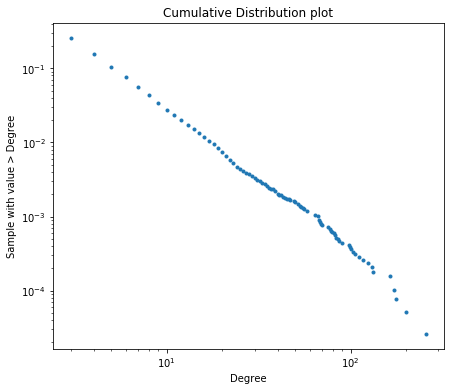

In [8]:
# HowTo get the cumulative distribution
N = 10000
m =3
G = nx.barabasi_albert_graph(N,m)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)
freq = 1.0*cs/sum(cs)

plt.figure(figsize=(7,6))

plt.loglog(deg, freq, '.')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")


## Exercise (7pts)

Compare three real-world datasets:

`protein.edgelist.txt`

`collaboration.edgelist.txt`

`powergrid.edgelist.txt`

(They can be imported using the `nx.read_edgelist` command)

(i) 
Plot the cumulative degree distribution for each network.
Can you decide whether it is power-law or exponentially distributed? 
(2pts)

(iii)
Estimate the exponent or the decay parameter in the exponential case, respectively.
   (a rough approximation is enough, no optimized fitting needed)
(2pts)

(iv)
Write a function to compute the average next-nearest-neighbor degree.
(2pts)

(v)
Identify the friendship paradox.
(1pt)